I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as $X$'s expected deviation from its mean, $\mu$. That is, I think of the variance as: $Var(X) =\mathbb{E}[(X - \mu)^2]$. Because $\mu$ is the expected value or average of $X$ you can also express the variance as

$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

because $\mu = \mathbb{E}[X]$. 

On Wikipedia and in textbooks the variance is also sometimes defined as  

$$Var(X) =\mathbb{E}[X]^2 - \mathbb{E}[X^2]$$

which is the mean of the square of $X$, minus the mean of the square of $E[X]$. I never find this second definition intuitive. This is a visual demonstration of the second definition of variance.

Before starting, let's just plow through the algebra to derive the second definition. Later on I will express the geometric intution.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have 

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X]^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X]^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X]^2]$$

In [76]:
import altair as alt
from vega_datasets import data

import numpy as np


## dead code
def make_pseudo_hist(X, Y):
    bi = []
    for x, y in zip(X,Y):
        bi.append({"x":x, "z": y, "y":0})
    return alt.Data({"values" : bi})
values, bins = np.histogram(s)


def f(x):
    return x ** 2


expected_value = f(np.mean(s))
expected_sq = np.mean([f(i) for i in s])

mu, sigma = 2.5, 2 # mean and standard deviation
s = [o for o in np.random.normal(mu, sigma, size=100)]


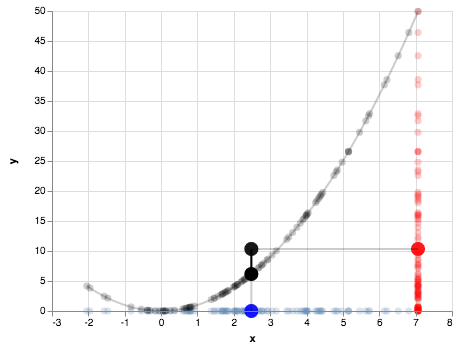

In [97]:

def make_altair_object(X, Y):
    bi = []
    for x, y in zip(X,Y):
        bi.append({"x":x, "y":y})
    return alt.Data({"values" : bi})

point_size = 50
expectation_size = 200
point_opacity = .2
expectation_opacity = .9
line_opacity=.2

dt = make_altair_object(s, np.zeros_like(s))

c1 = alt.Chart(dt).mark_point(size=point_size, filled=True, opacity=point_opacity).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x = np.linspace(min(s), max(s), 1000)
y = [f(i) for i in x]
dt = make_altair_object(x, y)


c2 = alt.Chart(dt).mark_line(opacity=line_opacity, color="black").encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object([np.mean(s)], [0])

c3 = alt.Chart(dt).mark_point(size=expectation_size, color="blue", opacity=expectation_opacity, filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)


dt = make_altair_object(X=s, Y=[f(i) for i in s])

c4 = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object(np.zeros_like(s) + np.max(x), Y=[f(i) for i in s])

c5 = alt.Chart(dt).mark_point(opacity=point_opacity, size=point_size, color="red", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object([np.max(s)], [np.mean([f(i) for i in s])])

c6 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="red", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

dt = make_altair_object([np.mean(s)], [np.mean([f(i) for i in s])])

c7 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x = [np.mean(s), np.max(s)]
y = [np.mean([f(i) for i in s]), np.mean([f(i) for i in s])]

dt = make_altair_object(x,y)

c8 = alt.Chart(dt).mark_line(color="black", opacity=line_opacity).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x = [np.mean(s), np.mean(s)]
y = [np.mean([f(i) for i in s]), 0]

dt = make_altair_object(x,y)

c9 = alt.Chart(dt).mark_line(color="black", opacity=line_opacity).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

x = [np.mean(s), np.mean(s)]
y = [np.mean([f(i) for i in s]), f(np.mean(s))]

dt = make_altair_object(x,y)

c10 = alt.Chart(dt).mark_line(color="black", opacity=1, thickness=100).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)


x = [np.mean(s)]
y = [f(np.mean(s))]

dt = make_altair_object(x,y)

c11 = alt.Chart(dt).mark_point(color="black", opacity=1, filled=True, size=expectation_size).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11